#1 Author
Student name: Akshata Akshata

#2 Problem Statement

Using the MLEnd Yummy Dataset, build a machine learning pipeline that takes as an input a photo of a dish that has either rice or chips and predicts whether the picture has rice or chips.

### Environment set-up

In [ ]:
!pip install mlend

In [ ]:
dir(mlend)

['__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'absolute_import',
 'division',
 'download_happiness',
 'download_hums_whistles',
 'download_load_happiness',
 'download_london_sounds',
 'download_spoken_numerals',
 'download_yummy',
 'download_yummy_small',
 'downloader',
 'happiness_load',
 'hums_whistles_load',
 'london_sounds_load',
 'name',
 'os',
 'print_function',
 'processing',
 'spoken_numerals_load',
 'sys',
 'yummy_load',
 'yummy_small_load']

### Downloading data

In [ ]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

import mlend
from mlend import download_yummy, yummy_load

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
baseDir = download_yummy(save_to = '/content/drive/MyDrive/Data/MLEnd')
baseDir

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|3250\3250|003250.jpg
Done!


'/content/drive/MyDrive/Data/MLEnd/yummy'

In [ ]:
#baseDir = '/content/drive/MyDrive/Data/MLEnd'

In [ ]:
os.listdir(baseDir)

['MLEndYD_images_small',
 'MLEndYD_image_attributes_small.csv',
 'MLEndYD_images',
 'MLEndYD_image_attributes_benchmark.csv',
 'yummy_image_model.h5']

###Loading Downloaded to DataFrame

In [ ]:
MLENDYD_df = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_benchmark.csv').set_index('filename')
MLENDYD_df

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A
filename,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train
000002.jpg,non_vegetarian,english,english,english_breakfast,home,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",unhealthy,2.0,like,4.0,Train
000003.jpg,non_vegetarian,chinese,chinese,spicy_chicken,jinli_flagship_branch,"chili,chicken,peanuts,sihuan_peppercorns,green...",neutral,3.0,strongly_like,5.0,Train
000004.jpg,vegetarian,indian,indian,gulab_jamun,home,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",unhealthy,2.0,strongly_like,5.0,Train
000005.jpg,non_vegetarian,indian,indian,chicken_masala,home,"chicken,lemon,turmeric,garam_masala,coriander_...",healthy,4.0,strongly_like,5.0,Train
...,...,...,...,...,...,...,...,...,...,...,...
003246.jpg,vegetarian,indian,indian,zeera_rice,home,"1_cup_basmati_rice,2_cups_water,2_tablespoons_...",healthy,4.0,strongly_like,5.0,Train
003247.jpg,vegetarian,indian,indian,paneer_and_dal,home,"fried_cottage_cheese,ghee,lentils,milk,wheat_f...",healthy,4.0,strongly_like,5.0,Test
003248.jpg,vegetarian,indian,indian,samosa,home,"potato,onion,peanut,salt,turmeric_powder,red_c...",very_unhealthy,1.0,like,4.0,Test


In [ ]:
sample_path = '/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images/*.jpg'
files = glob.glob(sample_path)
len(files)

3250

Let's check out 2 images

(-0.5, 4031.5, 3023.5, -0.5)

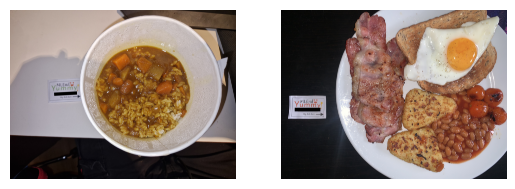

In [ ]:
I = plt.imread('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images/000001.jpg')
plt.subplot(1,2,1)
plt.imshow(I)
plt.axis('off')

I = plt.imread('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images/000002.jpg')
plt.subplot(1,2,2)
plt.imshow(I)
plt.axis('off')

#3 Machine Learning Pipeline

My Machine learning pipeline starts from here

#4 Transformation Stage

Here I'm labelling the dishes that have rice or chips based on ingredients as we want to predict whether our dishes have rice or chips or not

In [ ]:
MLENDYD_df['label'] = MLENDYD_df['Ingredients'].str.lower().str.contains('rice|chips').astype(int)

MLENDYD_df

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A,label
filename,,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train,1
000002.jpg,non_vegetarian,english,english,english_breakfast,home,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",unhealthy,2.0,like,4.0,Train,0
000003.jpg,non_vegetarian,chinese,chinese,spicy_chicken,jinli_flagship_branch,"chili,chicken,peanuts,sihuan_peppercorns,green...",neutral,3.0,strongly_like,5.0,Train,0
000004.jpg,vegetarian,indian,indian,gulab_jamun,home,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",unhealthy,2.0,strongly_like,5.0,Train,0
000005.jpg,non_vegetarian,indian,indian,chicken_masala,home,"chicken,lemon,turmeric,garam_masala,coriander_...",healthy,4.0,strongly_like,5.0,Train,0
...,...,...,...,...,...,...,...,...,...,...,...,...
003246.jpg,vegetarian,indian,indian,zeera_rice,home,"1_cup_basmati_rice,2_cups_water,2_tablespoons_...",healthy,4.0,strongly_like,5.0,Train,1
003247.jpg,vegetarian,indian,indian,paneer_and_dal,home,"fried_cottage_cheese,ghee,lentils,milk,wheat_f...",healthy,4.0,strongly_like,5.0,Test,0
003248.jpg,vegetarian,indian,indian,samosa,home,"potato,onion,peanut,salt,turmeric_powder,red_c...",very_unhealthy,1.0,like,4.0,Test,0


##5 Modelling:

Here I'm building a simple text classification model using Naive Bayes

In [ ]:
model = make_pipeline(CountVectorizer(), MultinomialNB())

# 6 Methodology

In [ ]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

#7 Dataset

Now I'm splitting the data for training and testing based on your Benchamark


In [ ]:
train_df = MLENDYD_df[MLENDYD_df['Benchmark_A'] == 'Train']
test_df = MLENDYD_df[MLENDYD_df['Benchmark_A'] == 'Test']

In [ ]:
X_train, y_train = train_df['Ingredients'], train_df['label']
X_test, y_test = test_df['Ingredients'], test_df['label']

#8. Results

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       721
           1       0.84      0.84      0.84       254

    accuracy                           0.92       975
   macro avg       0.89      0.89      0.89       975
weighted avg       0.92      0.92      0.92       975



Let's experiment by removing all the rows that doesn't have rice or chips



In [ ]:
# Drop rows where 'label' column is 0 using .loc
new_MLENDYD_df = MLENDYD_df.loc[MLENDYD_df['label'] == 1]

# Reset index if needed
new_MLENDYD_df.reset_index(drop=True, inplace=True)

new_MLENDYD_df

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A,label
0,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train,1
1,vegan,indian,indian,khichdi,home,"rice,spices,herbs",healthy,4.0,neutral,3.0,Test,1
2,vegetarian,indian,indian,lentil-based_vegetable_stew_with__rice,home,ingredients:\nfor_cooking_rice:\n1_cup_rice_(a...,healthy,4.0,like,4.0,Test,1
3,non_vegetarian,asian,asian,biryani,home,"mutton,rice,onion,tomato,red_chilli_powder,sal...",healthy,4.0,strongly_like,5.0,Train,1
4,vegetarian,indian,indian,rice_beetroot_curry,home,"rice,beetroot,salt,spices",very_healthy,5.0,neutral,3.0,Train,1
...,...,...,...,...,...,...,...,...,...,...,...,...
805,vegetarian,indian,indian,rasam_rice,home,"garlic,curry_leaves,green_chilli,cumin,black_p...",very_healthy,5.0,strongly_like,5.0,Test,1
806,non_vegetarian,singapore,singaporean,singapore_style_noodles,asda,"cooked_rice_noodles,roasted_chicken,water,red_...",very_healthy,5.0,like,4.0,Test,1
807,vegetarian,british,british,pan-fried_beef_with_rice,restaurant,"rice,corn,beef,red_cabbage",healthy,4.0,dislike,2.0,Train,1
808,vegetarian,italian,italian,khichdi,home,"rice,split_yellow_mung_beans,salt,cumin_seeds,...",healthy,4.0,neutral,3.0,Train,1


In [ ]:
new_train_df = new_MLENDYD_df[new_MLENDYD_df['Benchmark_A'] == 'Train']
new_test_df = new_MLENDYD_df[new_MLENDYD_df['Benchmark_A'] == 'Test']

new_X_train, new_y_train = new_train_df['Ingredients'], new_train_df['label']
new_X_test, new_y_test = new_test_df['Ingredients'], new_test_df['label']

# Train the model
model.fit(new_X_train, new_y_train)

# Make predictions on the test set
new_y_pred = model.predict(new_X_test)

# Evaluate the model
accuracy = accuracy_score(new_y_test, new_y_pred)
classification_rep = classification_report(new_y_test, new_y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       254

    accuracy                           1.00       254
   macro avg       1.00      1.00      1.00       254
weighted avg       1.00      1.00      1.00       254



This time I dropped all the data that didn't have rice or chips and trained the model to predict, we got full accuracy